In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dropout,Flatten,Dense
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.image_utils import img_to_array,load_img
import cv2
from PIL import Image
import numpy as np

In [2]:
Size = 150

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255.0,
                                   rotation_range = 40,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   brightness_range = (0.5, 1.5))

In [4]:
train_set = train_datagen.flow_from_directory(directory=r'C:\Users\acer\Downloads\Malaria_Dataset\Train',
                                           target_size=(Size,Size),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 416 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1/255.0)

In [6]:
test_set = test_datagen.flow_from_directory(directory=r'C:\Users\acer\Downloads\Malaria_Dataset\Test',
                                           target_size=(Size,Size),
                                           class_mode = 'binary',
                                           batch_size = 16)

Found 134 images belonging to 2 classes.


In [7]:
INPUT_SHAPE = (Size, Size, 3)

In [8]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer = 'he_uniform'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer = 'he_uniform'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 32)        0

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [14]:
history=model.fit_generator(train_set,
                    steps_per_epoch=400//16,
                    epochs=30,
                    validation_data=test_set,
                    validation_steps=150//16,
                    callbacks=[early_stop])

C:\Users\acer\AppData\Local\Temp\ipykernel_12824\3507960428.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_set,


Epoch 1/30
25/25 [==============================] - 10s 390ms/step - loss: 0.3038 - accuracy: 0.8825 - val_loss: 0.3327 - val_accuracy: 0.8433
Epoch 2/30
25/25 [==============================] - 10s 400ms/step - loss: 0.2352 - accuracy: 0.9350 - val_loss: 0.2446 - val_accuracy: 0.8881
Epoch 3/30
25/25 [==============================] - 10s 406ms/step - loss: 0.1798 - accuracy: 0.9575 - val_loss: 0.2349 - val_accuracy: 0.8881
Epoch 4/30
25/25 [==============================] - 10s 412ms/step - loss: 0.1706 - accuracy: 0.9625 - val_loss: 0.2114 - val_accuracy: 0.9179
Epoch 5/30
25/25 [==============================] - 11s 419ms/step - loss: 0.1598 - accuracy: 0.9700 - val_loss: 0.1668 - val_accuracy: 0.9328
Epoch 6/30
25/25 [==============================] - 11s 422ms/step - loss: 0.1604 - accuracy: 0.9675 - val_loss: 0.2243 - val_accuracy: 0.8955
Epoch 7/30
25/25 [==============================] - 11s 420ms/step - loss: 0.1165 - accuracy: 0.9825 - val_loss: 0.1743 - val_accuracy: 0.9627

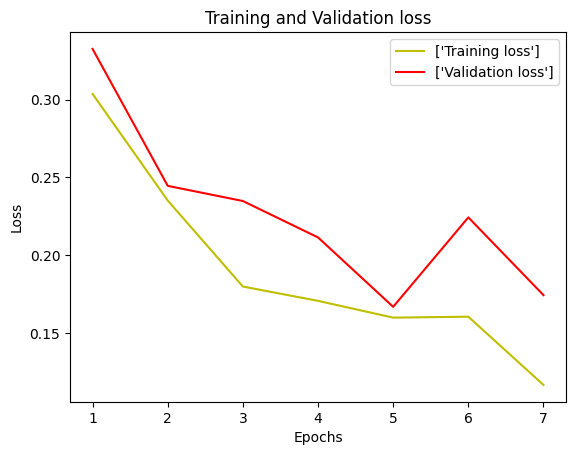

In [15]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label=['Training loss'])
plt.plot(epochs,val_loss,'r',label=['Validation loss'])
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

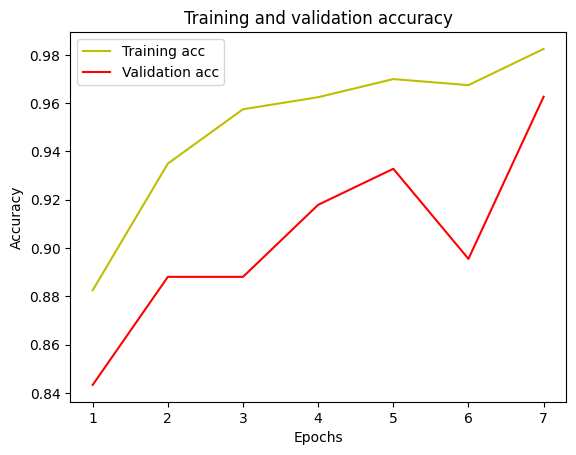

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [86]:
model.save('malaria_augmented_model.h5')

In [87]:
img_1 = load_img(r"C:\Users\acer\Downloads\Malaria_Dataset\Test\Parasite\C39P4thinF_original_IMG_20150622_105554_cell_9.png",target_size=(150,150))
img_2 = load_img(r"C:\Users\acer\Downloads\Malaria_Dataset\Test\Uninfected\C3thin_original_IMG_20150608_163002_cell_88.png",target_size=(150,150))

In [88]:
x1 = img_to_array(img_1)
x2 = img_to_array(img_2)

In [89]:
x1 = x1/255
x2 = x2/255

In [90]:
x1 = x1.reshape((1,) + x1.shape)
x2 = x2.reshape((1,) + x2.shape)

In [91]:
X1 = model.predict(x1)
X1

1/1 [==============================] - 0s 50ms/step


array([[3.0758198e-11]], dtype=float32)

In [92]:
X2 = model.predict(x2)
X2

1/1 [==============================] - 0s 53ms/step


array([[0.8743562]], dtype=float32)

In [93]:
if X1<=0:
    print('The image is parasitized')
else:
    print('The image is uninfected')      

The image is uninfected


# SVM

In [61]:
from keras.regularizers import l2

In [62]:
model2 = Sequential()
model2.add(Conv2D(16,(3,3),activation='relu',input_shape=INPUT_SHAPE))
model2.add(MaxPooling2D(2,2))

model2.add(Conv2D(32,(3,3),activation='relu',kernel_initializer = 'he_uniform'))
model2.add(MaxPooling2D(2,2))

model2.add(Conv2D(64,(3,3),activation='relu',kernel_initializer = 'he_uniform'))
model2.add(MaxPooling2D(2,2))

model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1,kernel_regularizer=l2(0.01),activation='linear'))

In [63]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

In [64]:
model2.compile(optimizer='adam',loss='hinge',metrics=['accuracy'])

In [66]:
history2 = model2.fit_generator(train_set,
                    steps_per_epoch=400//16,
                    epochs=30,
                    validation_data=test_set,
                    validation_steps=150//16,
                    callbacks=[early_stop])

C:\Users\acer\AppData\Local\Temp\ipykernel_12824\2466518791.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model2.fit_generator(train_set,


Epoch 1/30
25/25 [==============================] - 13s 516ms/step - loss: 0.4924 - accuracy: 0.7600 - val_loss: 0.8629 - val_accuracy: 0.6866
Epoch 2/30
25/25 [==============================] - 12s 484ms/step - loss: 0.4115 - accuracy: 0.8350 - val_loss: 0.6292 - val_accuracy: 0.7463
Epoch 3/30
25/25 [==============================] - 11s 447ms/step - loss: 0.3669 - accuracy: 0.8625 - val_loss: 0.5615 - val_accuracy: 0.7537
Epoch 4/30
25/25 [==============================] - 12s 461ms/step - loss: 0.2806 - accuracy: 0.8900 - val_loss: 0.5525 - val_accuracy: 0.7388
Epoch 5/30
25/25 [==============================] - 12s 464ms/step - loss: 0.2001 - accuracy: 0.9450 - val_loss: 0.4347 - val_accuracy: 0.8507
Epoch 6/30
25/25 [==============================] - 16s 643ms/step - loss: 0.1862 - accuracy: 0.9500 - val_loss: 0.3065 - val_accuracy: 0.8881
Epoch 7/30
25/25 [==============================] - 11s 451ms/step - loss: 0.1687 - accuracy: 0.9425 - val_loss: 0.3025 - val_accuracy: 0.9030

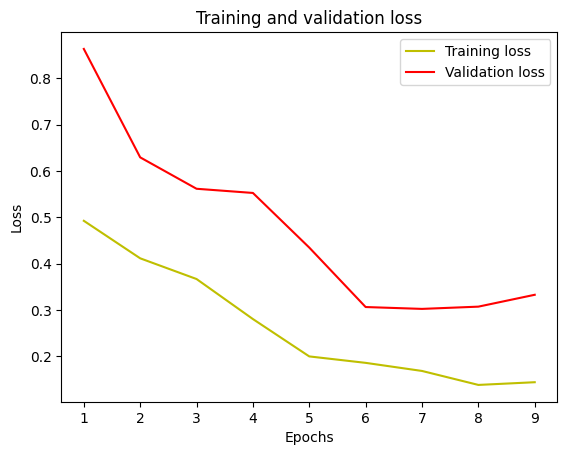

In [67]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

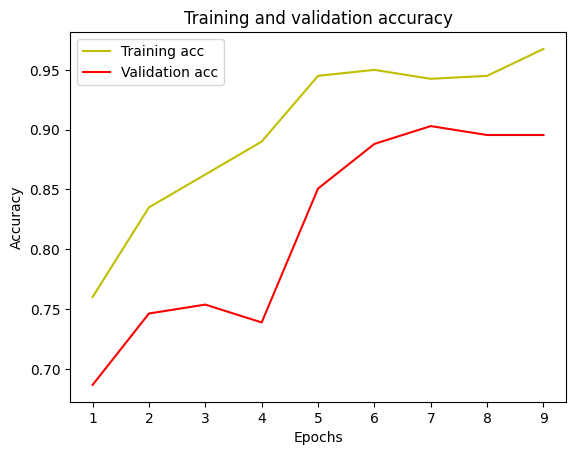

In [68]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model2.save('malaria_augmented_SVM_model.h5')

In [94]:
Y1 = model2.predict(x1)
Y1

1/1 [==============================] - 0s 359ms/step


array([[-1.290347]], dtype=float32)

In [95]:
Y2 = model2.predict(x2)
Y2

1/1 [==============================] - 0s 82ms/step


array([[1.5535725]], dtype=float32)

In [75]:
if Y1<=0:
    print('The image is parasitized')
else:
    print('The image is uninfected')

The image is parasitized
